{'data': array([[1.799e+01, 1.038e+01, 1.228e+02, ..., 2.654e-01, 4.601e-01,
        1.189e-01],
       [2.057e+01, 1.777e+01, 1.329e+02, ..., 1.860e-01, 2.750e-01,
        8.902e-02],
       [1.969e+01, 2.125e+01, 1.300e+02, ..., 2.430e-01, 3.613e-01,
        8.758e-02],
       ...,
       [1.660e+01, 2.808e+01, 1.083e+02, ..., 1.418e-01, 2.218e-01,
        7.820e-02],
       [2.060e+01, 2.933e+01, 1.401e+02, ..., 2.650e-01, 4.087e-01,
        1.240e-01],
       [7.760e+00, 2.454e+01, 4.792e+01, ..., 0.000e+00, 2.871e-01,
        7.039e-02]]), 'target': array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0,
       0, 0, 1, 0, 1, 1, 1, 1, 1, 0, 0, 1, 0, 0, 1, 1, 1, 1, 0, 1, 0, 0,
       1, 1, 1, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 1, 1, 1, 0, 0, 1, 0, 0, 0,
       1, 1, 1, 0, 1, 1, 0, 0, 1, 1, 1, 0, 0, 1, 1, 1, 1, 0, 1, 1, 0, 1,
       1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 1, 0, 0, 1, 1, 1, 0, 0, 1, 0, 1, 0,
 

TypeError: 'GridSearchCV' object is not subscriptable

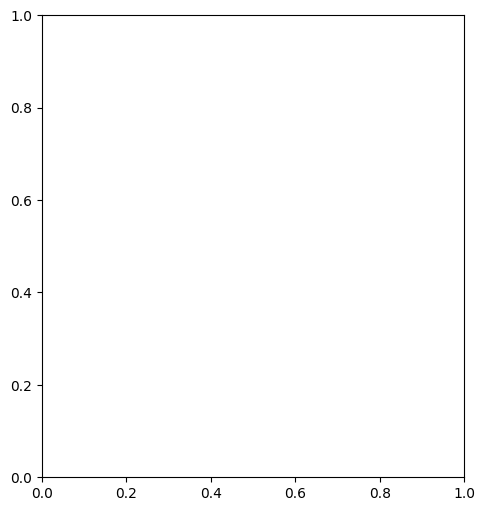

In [1]:
from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.preprocessing import StandardScaler
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt


# МЕТОД РЕГРЕССИИ
# считаем отдельно методом линейной регрессии, потом методом Ridge и методом Lasso
# а потом складываем все результаты и записываем в results + строим графики

# корректная полная формула - посчитать саначала отдельно по классам и потом уже применить формулу:
# сумма верноклассифицированных точек / на общее кол-во точек


# ОСНОВА - РАБОТАЕМ С DATAFRAME
# подгружаем load_breast_cancer
cancer = load_breast_cancer()
print(cancer)


# когда используем все сходные признаки, подключаем feature_name, для целевой переменной data берем только первый столбец
data = pd.DataFrame(cancer.data, columns=cancer.feature_names)      # входные атрибуты (признаки), которые там что-то в data_frame
# размерность (кол-во строк на кол-во столбцов)
print(data.shape)  
# (569x30)


# приводим к формату DataFrame из библиотеки pandas
target = pd.DataFrame(cancer.target, columns=["target"])            
print(target.shape)
# (569x1)
df = pd.concat([data, target], axis=1)
print(df)
# [569 rows x 31 columns]


# Есть тренировочные данные - train(на них приходится 70%) и тестовые - test (на них 30%)

X = df.drop("target", axis=1)
y = df["target"]

X_train, X_test, y_train, y_test = train_test_split(X, y, 
                                                    test_size=0.3, 
                                                    random_state=42)

# размерность (кол-во строк на кол-во столбцов)
print(X_train.shape)
print(X_test.shape)
# (398x30) 
# (171x30)


## СТАНДАРТИЗИРУЕМ

scaler = StandardScaler()                       # функция которая нормирует границы от 0 до 1
# метод fit_transform
X_train = scaler.fit_transform(X_train)         # разбили X_train на 30% и 70% (получилось 105 строк на 4 столбца)
# print(X_train)
X_test = scaler.fit_transform(X_test)
# print(X_test)


## ЛИНЕЙНАЯ РЕГРЕССИЯ

# метод регрессии применяем только для числовых значений 
linear_regressor = LinearRegression()   # сформировали модель # у линейнлй регрессии есть различные параметры
linear_regressor.fit(X_train, y_train)  # метод линейной модели позволяет обучать данные, которые подали как аргумент, он запоминает, у каких точек какие метки класса должны быть

# должны проверить, как модель обучилась - делаем предсказание метки класса (метод predict!)
y_pred_linear = linear_regressor.predict(X_test)
print(y_pred_linear.shape)              # 171 строка на 1 столбец
print(y_pred_linear)

mse_linear = mean_squared_error(y_test, y_pred_linear)
print(mse_linear)
r2_linear = r2_score(y_test, y_pred_linear)
print(f"Лучший MSE (Linear): {mse_linear}")
print(f"Лучший R^2 (Linear): {r2_linear}")


## RIDGE РЕГРЕССИЯ

ridge_regressor = Ridge() # у метод регрессии Ridge есть различные параметры
# создали массив при трех значениях параметра альфа
param_grid_ridge = {'alpha': np.logspace(-3, 3, 7)} # смотрим вариции работы параметра альфа 

# запускаем алгоритм кросс-валидации (1 прогон выборки = 5 валидаций (4 в составе обучайщей, 1 раз в тестовой))
grid_search_ridge = GridSearchCV(ridge_regressor, 
                                param_grid_ridge, cv=5, 
                                scoring='neg_mean_squared_error') #
result = grid_search_ridge.fit(X_train, y_train)
print(result)

# было 5 запусков, покажется наилучшее значение
print('Лучшие параметры гребневой регрессии:', grid_search_ridge.best_params_)
print('Лучшая оценка на кросс-валидации (MSE) (Ridge):', grid_search_ridge.best_score_)

# best_estimator выводит наилучшую модель
# какая модель наиболее эффективно для решения задачи
best_ridge_regressor = grid_search_ridge.best_estimator_
print(best_ridge_regressor)
# применяем predict и для наилучшей обученной модели подаем тестовую выборку
y_pred_ridge = best_ridge_regressor.predict(X_test)

mse_ridge = mean_squared_error(y_test, y_pred_ridge)
r2_ridge = r2_score(y_test, y_pred_ridge)
print(f"Лучший MSE (Ridge): {mse_ridge}")
print(f"Лучший R^2 (Ridge): {r2_ridge}")


## LASSO РЕГРЕССИЯ

lasso_regressor = Lasso()
param_grid_lasso = {'alpha': np.logspace(-3, 3, 7)}

grid_search_lasso = GridSearchCV(lasso_regressor, 
                                param_grid_lasso,
                                scoring='neg_mean_squared_error')
grid_search_lasso.fit(X_train, y_train)

best_lasso_regressor = grid_search_lasso.best_estimator_
y_pred_lasso = best_lasso_regressor.predict(X_test)

mse_lasso = mean_squared_error(y_test, y_pred_lasso)
r2_lasso = r2_score(y_test, y_pred_lasso)
print(f"Лучший MSE (Lasso): {mse_lasso}")
print(f"Лучший R^2 (Lasso): {r2_lasso}")


## ОБЩИЙ РЕЗУЛЬТАТ

results = pd.DataFrame({'Model': ['Linear Regression', 'Ridge Regression', 'Lasso Regresion'],
                        'MSE': [mse_linear, mse_ridge, mse_lasso], 
                        'R^2': [r2_linear, r2_ridge, r2_lasso]})
print(results)


## ГРАФИКИ

plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
plt.bar(results['Model'], result['MSE'], color=['blue', 'orange', 'green'])
plt.title('Сравение R^2 моделей')
plt.ylabel('R^2 Score')

plt.tight_layout()
plt.show()

if r2_linear > r2_ridge and r2_linear > r2_lasso:
    print(
        "Линейная регрессия показала наилучшие результаты и лучше всего подходит для данной задачи."
    )
elif r2_ridge > r2_linear and r2_ridge > r2_lasso:
    print(
        "Гребневая рекурсия показала наилучшие результаты и лучше всего подходит для данной задачи."
    )
else:
    print(
        "Лассо-регрессия показала наилучшие результаты и лучше всего подходит для данной задачи."
    )

# посчитали для разными методами по отдельности и соединили результат - меньше ошибка вычисления
